In [21]:
#Python EDA using Pandas
#importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Set seaborn theme

sns.set_theme(style="whitegrid")

In [44]:
# Load the CSV file

df = pd.read_csv("uber_cleaned_data.csv")
df["Request Hour"] = df["Request Hour"].astype(int)

In [30]:
# Display first few rows

df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Hour,Time Slot,Trip Type
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00,11,Morning,11-07-2016 13:00 - Trip Completed
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47,17,Evening,11-07-2016 18:47 - Trip Completed
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58,9,Morning,12-07-2016 09:58 - Trip Completed
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03,21,Night,12-07-2016 22:03 - Trip Completed
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25,8,Morning,13-07-2016 09:25 - Trip Completed


In [71]:
# Basic dataset info

print("Basic Info:")
print(df.info())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Request id         6745 non-null   int64 
 1   Pickup point       6745 non-null   object
 2   Driver id          6745 non-null   object
 3   Status             6745 non-null   object
 4   Request timestamp  6745 non-null   object
 5   Drop timestamp     6745 non-null   object
 6   Request Hour       6745 non-null   int64 
 7   Time Slot          6745 non-null   object
 8   Trip Type          6745 non-null   object
 9   TimeSlotCode       6745 non-null   int8  
 10  PickupCode         6745 non-null   int8  
 11  Driver Assigned    6745 non-null   bool  
 12  Trip Completed     6745 non-null   bool  
dtypes: bool(2), int64(2), int8(2), object(7)
memory usage: 500.7+ KB
None


In [72]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
Request Hour         0
Time Slot            0
Trip Type            0
TimeSlotCode         0
PickupCode           0
Driver Assigned      0
Trip Completed       0
dtype: int64


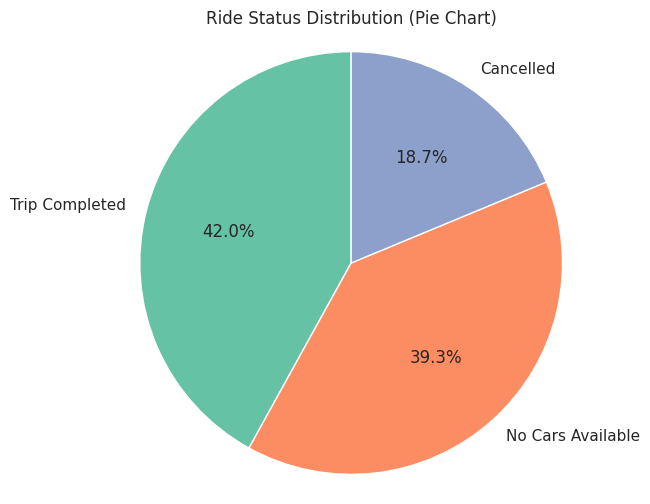

In [73]:
# Pie chart shows the proportion of Completed, Cancelled, and No Cars Available
status_counts = df["Status"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("Set2"))
plt.title("Ride Status Distribution (Pie Chart)")
plt.axis("equal")
plt.show()



/tmp/ipython-input-74-2657180374.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette="pastel")


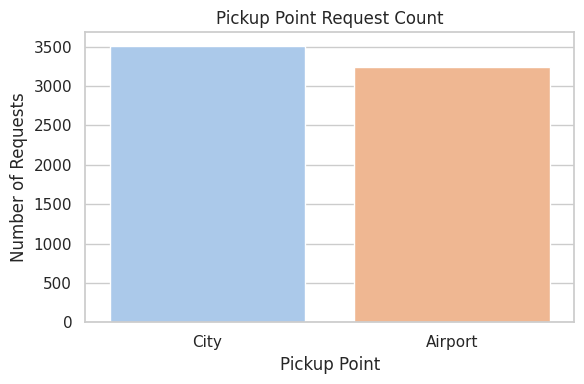

In [74]:
# Bar plot compares the number of requests from Airport and City
pickup_counts = df["Pickup point"].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette="pastel")
plt.title("Pickup Point Request Count")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.tight_layout()
plt.show()




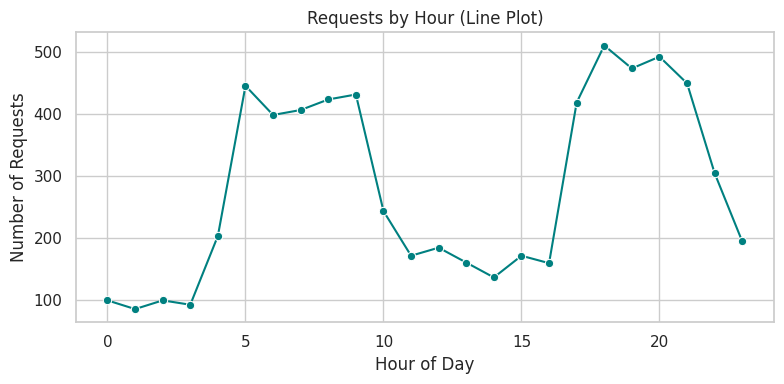

In [75]:
# Line plot shows trends in ride demand throughout the day (0–23 hours)
hourly_requests = df["Request Hour"].value_counts().sort_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x=hourly_requests.index, y=hourly_requests.values, marker="o", color="teal")
plt.title("Requests by Hour (Line Plot)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.tight_layout()
plt.show()



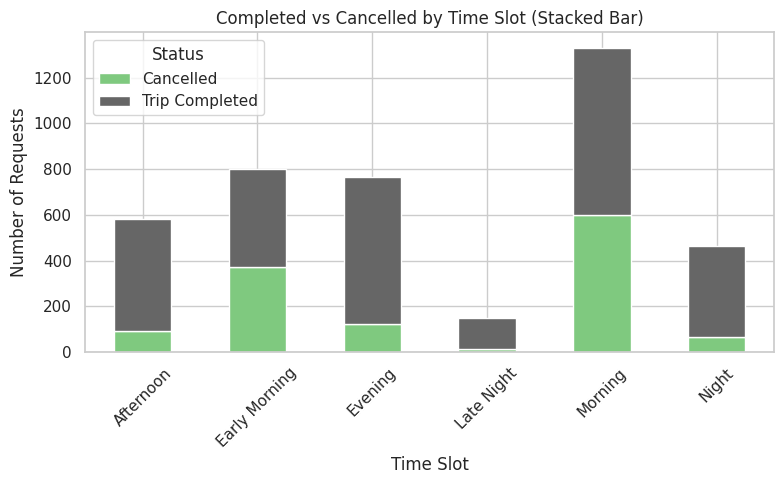

In [50]:
# Stacked bar chart shows ride outcome by time slot (e.g., Morning, Night)
stacked = df[df["Status"].isin(["Trip Completed", "Cancelled"])]
grouped = stacked.groupby(["Time Slot", "Status"]).size().unstack().fillna(0)
grouped.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Accent")
plt.title("Completed vs Cancelled by Time Slot (Stacked Bar)")
plt.xlabel("Time Slot")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



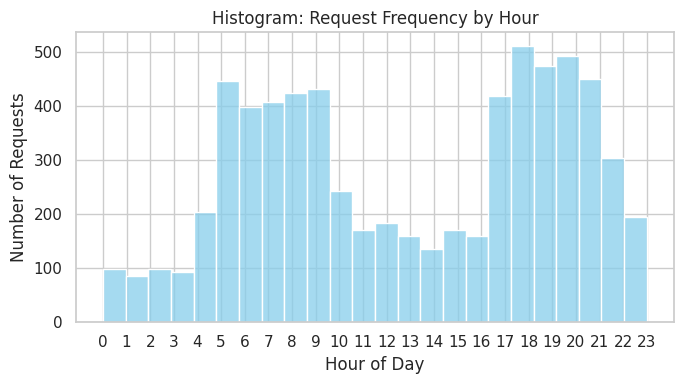

In [76]:
# Histogram shows how many rides were requested in each hour
plt.figure(figsize=(7, 4))
sns.histplot(df["Request Hour"], bins=24, kde=False, color="skyblue")
plt.title("Histogram: Request Frequency by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


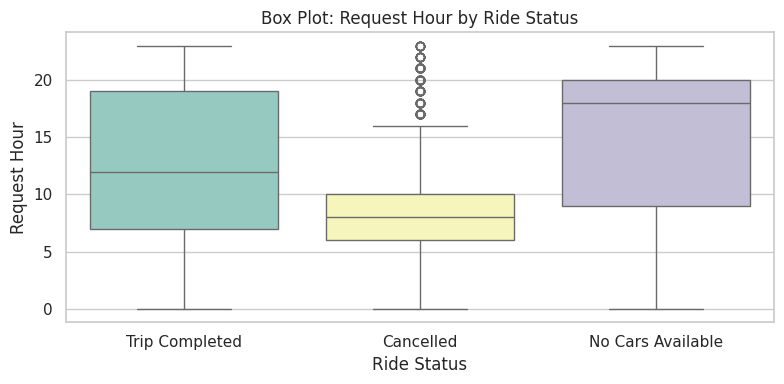

In [83]:
# Box Plot: Request Hour by Ride Status (Fixed warning)
# Displays median and outliers in request time across statuses
plt.figure(figsize=(8, 4))
sns.boxplot(x="Status", y="Request Hour", hue="Status",
            data=df, palette="Set3", legend=False)
plt.title("Box Plot: Request Hour by Ride Status")
plt.xlabel("Ride Status")
plt.ylabel("Request Hour")
plt.tight_layout()
plt.show()



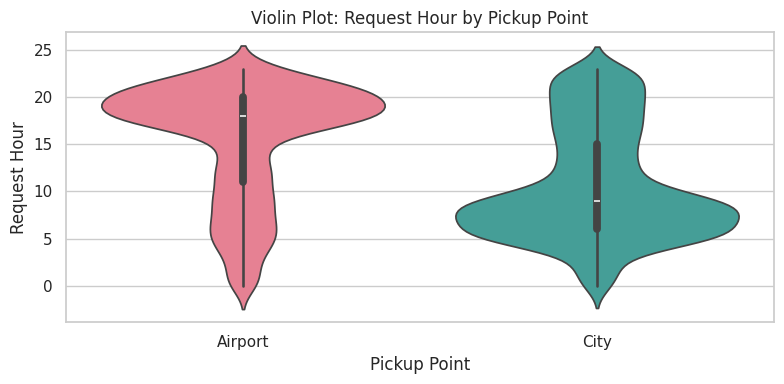

In [82]:
# Violin Plot: Request Hour by Pickup Point (Fixed warning)
# Shows request time distribution shape for City vs Airport
plt.figure(figsize=(8, 4))
sns.violinplot(x="Pickup point", y="Request Hour", hue="Pickup point",
               data=df, palette="husl", legend=False)
plt.title("Violin Plot: Request Hour by Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Request Hour")
plt.tight_layout()
plt.show()



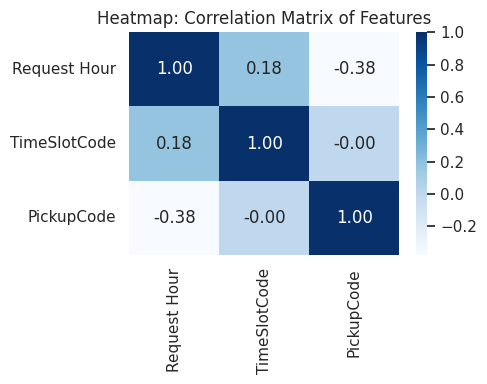

In [79]:
# Heatmap shows correlations between numerical and encoded categorical features
plt.figure(figsize=(5, 4))
sns.heatmap(df[["Request Hour", "TimeSlotCode", "PickupCode"]].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Heatmap: Correlation Matrix of Features")
plt.tight_layout()
plt.show()


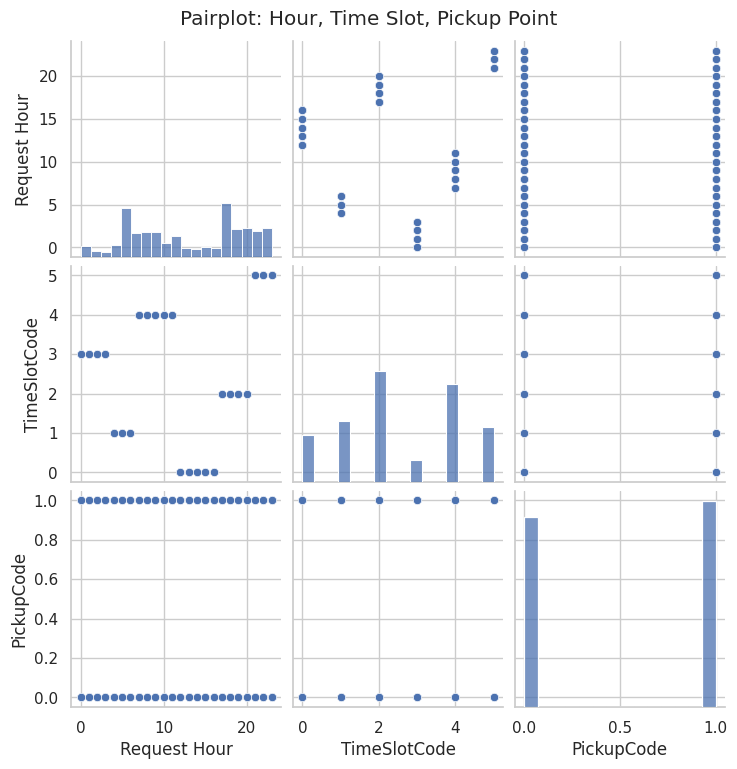

In [80]:
# Pairplot shows scatter relationships between hour, time slot, and pickup point codes
sns.pairplot(df[["Request Hour", "TimeSlotCode", "PickupCode"]])
plt.suptitle("Pairplot: Hour, Time Slot, Pickup Point", y=1.02)
plt.show()


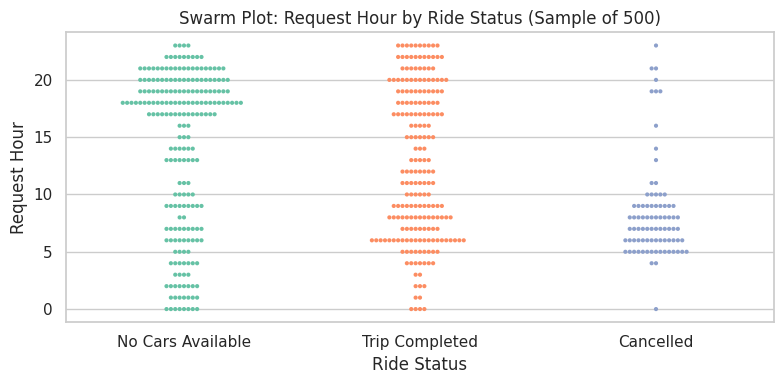

In [85]:
# Swarm Plot: Request Hour by Ride Status (Sample of 500)
# Each dot shows one ride’s request time, grouped by status
plt.figure(figsize=(8, 4))
sns.swarmplot(x="Status", y="Request Hour", hue="Status",
              data=df.sample(500), palette="Set2", size=3, legend=False)
plt.title("Swarm Plot: Request Hour by Ride Status (Sample of 500)")
plt.xlabel("Ride Status")
plt.ylabel("Request Hour")
plt.tight_layout()
plt.show()

